#### The function `vertex_adjacency_matrix` computes the vertex adjacency matrix of a given graph $G$.
>#### Input
> - `G`: A sage graph object
>#### Output
>- Returns an $n×n$ sage matrix object(where $n$ is the number of vertices) representing the adjacency relationships between vertices

In [1]:
def vertex_adjacency_matrix(G):
    V = G.vertices()
    E = G.edges()
    n = len(V)
    m = len(E)
    VV = {} # Creates a mapping (VV) from vertex labels to integer indices (0 to n-1)
    for i in range(n):
        VV[V[i]]=i
    EE = [] # Converts the edge list (E) to use these integer indices instead of original vertex labels, storing them in EE
    for i in range(m):
        EE.append((VV[E[i][0]],VV[E[i][1]]))
        
    AT = [[0 for i in range(n)] for j in range(n)]
    for k in range(m):
        (ii,jj) = EE[k]
        if ii==jj:
            AT[ii][jj] +=2 # If an edge connects a vertex to itself (self-loop), add 2 to the corresponding diagonal element
        else:
            AT[ii][jj] +=1 # If an edge connects different vertices, add 1 to the corresponding matrix elements
            AT[jj][ii] +=1
    return Matrix(AT)

#### The function `twisted_vertex_adjacency_matrix` creates a special type of adjacency matrix for a graph $G$ with a "twist" factor applied to each edge.
>#### Input
> - `G`: A sage graph object
> - `twist`: A list of values (likely complex numbers) that correspond to each edge
>#### Output
> - Returns an $n×n$ sage matrix object (where $n$ is the number of vertices) representing the twisted vertex adjacency matrix

In [2]:
def twisted_vertex_adjacency_matrix(G,twist):
    V = G.vertices()
    E = G.edges()
    n = len(V)
    m = len(E)
    VV = {}  # Creates a mapping (VV) from vertex labels to integer indices (0 to n-1)
    for i in range(n):
        VV[V[i]]=i
    EE = []
    for i in range(m):
        EE.append((VV[E[i][0]],VV[E[i][1]]))  # Converts the edge list (E) to use these integer indices instead of original vertex labels, storing them in EE
        
    AT = [[0 for i in range(n)] for j in range(n)]
    for k in range(m):
        (ii,jj) = EE[k]
        if ii==jj:
            AT[ii][jj] +=twist[k]+conjugate(twist[k])  
        else:
            AT[ii][jj] +=twist[k]
            AT[jj][ii] +=conjugate(twist[k])
    return Matrix(AT)

#### The function `trace_twisted_vertex_adjacency` calculates the trace of a powered twisted vertex adjacency matrix for a graph $G$. 
>#### Input
>- `G`: A sage graph object
>- `t`: An integer parameter used to define a root of unity $\exp(2\pi i/t)$
>- `l`: The power to which the matrix will be raised
>- `gamma`: A list of exponents, one for each edge of the graph
> #### Output
>- Returns the numerical approximation of the trace (sum of diagonal elements) of the resulting matrix

In [3]:
def trace_twisted_vertex_adjacency(G,t,l,gamma):
    m = G.num_edges()
    pr  = exp(I*2*pi/t)   # a primitive t-th root of unity
    twist = [pr^(gamma[i]) for i in range(m)]
    return (numerical_approx(twisted_vertex_adjacency_matrix(G,twist))^l).trace()

#### The function `edge_adjacency_matrix` computes the edge adjacency matrix of a given graph $G$.
>#### Input
> - `G`: A sage graph object
>#### Output
>- Returns an $2m×2m$ sage matrix object(where $m$ is the number of edges) representing the adjacency relationships between oriented edges

In [4]:
def edge_adjacency_matrix(G):
    E = G.edges()
    m = len(E)
    WT = [[0 for i in range(2*m)] for j in range(2*m)]
    for i in range(m):
        if E[i][1]==E[i][0]:
            WT[i][i]=1
            WT[m+i][m+i]= 1
        for j in range(m):
            if i!=j:
                if E[i][1]==E[j][0]:
                    WT[i][j]=1
                if E[i][1] == E[j][1]:
                    WT[i][m+j]=1
                if E[i][0]==E[j][0]:
                    WT[m+i][j]= 1
                if E[i][0]==E[j][1]:
                    WT[m+i][m+j]=1
    return Matrix(WT)

#### The function `twisted_edge_adjacency_matrix` creates a special type of edge adjacency matrix for a graph $G$ with a "twist" factor applied to each edge.
>#### Input
> - `G`: A sage graph object
> - `twist`: A list of values (likely complex numbers) that correspond to each edge
>#### Output
> - Returns a $2m×2m$ sage matrix object (where $m$ is the number of edges) representing the twisted edge adjacency matrix

In [5]:
def twisted_edge_adjacency_matrix(G,twist):
    E = G.edges()
    m = len(E)
    WT = [[0 for i in range(2*m)] for j in range(2*m)]
    for i in range(m):
        if E[i][1]==E[i][0]:
            WT[i][i]=twist[i]
            WT[m+i][m+i]= conjugate(twist[i])^(-1)
        for j in range(m):
            if i!=j:
                if E[i][1]==E[j][0]:
                    WT[i][j]=twist[i]
                if E[i][1] == E[j][1]:
                    WT[i][m+j]=twist[i]
                if E[i][0]==E[j][0]:
                    WT[m+i][j]= conjugate(twist[i])
                if E[i][0]==E[j][1]:
                    WT[m+i][m+j]=conjugate(twist[i])
    return Matrix(WT)

#### The function `trace_twisted_edge_adjacency` calculates the trace of a powered twisted edges adjacency matrix for a graph $G$. 
>#### Input
>- `G`: A graph object
>- `t`: An integer parameter used to define a root of unity $\exp(2\pi i/t)$
>- `l`: The power to which the matrix will be raised
>- `gamma`: A list of exponents, one for each edge of the graph
> #### Output
>- Returns the numerical approximation of the trace (sum of diagonal elements) of the resulting matrix

In [6]:
def trace_twisted_edge_adjacency(G,t, l, gamma):
    m = G.num_edges()
    pr  = exp(I*2*pi/t)   # Calculate primitive t-th root of unity
    twist = [pr^(gamma[i]) for i in range(m)]   # Create twist values using gamma exponents
    return (numerical_approx(twisted_edge_adjacency_matrix(G,twist))^l).trace()

#### The function `circuit_count` counts the number of circuits with specified abelianization. 
>#### Input
>- `G`: A graph object
>- `F`: A list of edges to modulate
>- `t`: An integer parameter used to define a root of unity $\exp(2\pi i/t)$
>- `l`: length of the circuit
>- `alpha`: An element of $C_1(G,\mathbb{Z}/t\mathbb{Z})$
> #### Output
>- Returns the number of circuits whose abelianization mod `t` is identical to `alpha` when restricted to `F`

#### The function `closedwalk_count` counts the number of closed walks with specified abelianization. 
>#### Input
>- `G`: A graph object
>- `F`: A list of edges to modulate
>- `t`: An integer parameter used to define a root of unity $\exp(2\pi i/t)$
>- `l`: length of the circuit
>- `alpha`: An element of $C_1(G,\mathbb{Z}/t\mathbb{Z})$
> #### Output
>- Returns the number of closed walks whose abelianization  mod `t` is identical to `alpha` when restricted to `F`

In [7]:
def dot(x,y):
    sum = 0
    for i in range(len(x)):
        sum+=x[i]*y[i]
    return sum
    
def circuit_count(G,F, t,l,alpha):
    cnt = 0
    m = G.num_edges()
    pr  = numerical_approx(exp(I*2*pi/t))  # a primitive t-th root of unity
    for i in range(t^len(F)):
        ii = i
        gamma = [0 for k in range(m)]
        for j in range(len(F)):
            r = ii%t
            gamma[F[j]] = r
            ii = ii//t
        cnt += pr^(-dot(gamma,alpha))*trace_twisted_edge_adjacency(G,t, l, gamma)
    return cnt/(t^len(F))

def closedwalk_count(G,F,t,l,alpha):
    cnt = 0
    m = G.num_edges()
    pr  = numerical_approx(exp(I*2*pi/t))
    for i in range(t^len(F)):
        ii = i
        gamma = [0 for k in range(m)]
        for j in range(len(F)):
            r = ii%t
            gamma[F[j]] = r
            ii = ii//t
        cnt += pr^(-dot(gamma,alpha))*trace_twisted_vertex_adjacency(G,t, l, gamma)
            
    return cnt/(t^len(F))

#### The function `arborescence_count` counts the number of arborescences (directed rooted spanning trees) in a graph $G$ using a directed version of Kirchhoff's matrix tree theorem: 
>#### Input
>- `G`: A graph object
>- `reverse`: an optional parameter to specify edge orientations
>#### Output 
>- Return the number of arborescences that euqals the determinant of a reduced Laplacian matrix  (excluding the last vertex as root)

#### The function `eulerian_count` counts the number of Eulerian cycles on a directed or undirected graph based on the BEST theorem
>#### Input
>- `G`: A graph object
>- `directed`: shows whether it is a counting problem for directed or undirected graph, with a default value of being undirected
>- `baseorientation`: an optional parameter to set the initial edge orientations

>#### Output 
>- For directed: returns the number of Eulerian cycles using the BEST theorem and calling to the function `arborescence_count`
>- For undirected: returns a tuple of total count of Eulerian cycles and a list of Eulerian orientations relative to the `baseorientation`

In [8]:
def arborescence_count(G,reverse=None):
    V = G.vertices()
    E = G.edges()
    n = len(V)
    m = len(E)
    VV = {}
    for i in range(n):
        VV[V[i]]=i
    EE = []
    for i in range(m):
        EE.append((VV[E[i][0]],VV[E[i][1]]))


    L = [[0 for i in range(n-1)] for j in range(n-1)]
    if reverse == None:
        reverse = [0]*m
    for k in range(m):
        ii,jj = EE[k][reverse[k]], EE[k][1-reverse[k]]
        if ii<n-1:     # Skip root vertex (n-1)
            L[ii][ii]+=1   # Add to diagonal
            if jj<n-1:
                L[ii][jj]-=1   # Subtract from off-diagonal
    #print(Matrix(L))
    if n==1:
        return 1
    else:
        return Matrix(L).det() 

def eulerian_count(G,directed=False, baseorientation = None):
    V = G.vertices()
    E = G.edges()
    n = len(V)
    m = len(E)
    VV = {}
    for i in range(n):
        VV[V[i]]=i
    EE = []
    if baseorientation == None:
        baseorientation = [0]*m
    
    for k in range(m):
        EE.append((VV[E[k][baseorientation[k]]],VV[E[k][1-baseorientation[k]]]))
    OE = [[] for i in range(n)]
    IE = [[] for i in range(n)]
    for k in range(m):
        OE[EE[k][0]].append(k)
        IE[EE[k][1]].append(k)

        
    if directed==True:
        for i in range(n):
            if len(OE[i]) !=  len(IE[i]):
                raise Exception("The directed graph is not Eulerian!")
        temp = 1
        for i in range(n):
            temp *= factorial(len(OE[i])-1)
        return arborescence_count(G,reverse=baseorientation)*temp

    else:
        EulerianOrientations = []
        EulerianCount= 0
        for s in range(2^m):
            ss = [int(b) for b in bin(s)[2:].zfill(m)]

            outdeg = []
            for i in range(n):
                cnt_out = cnt_in = 0
                for k in OE[i]:
                    if ss[k]==0:
                        cnt_out +=1
                    else:
                        cnt_in +=1

                for k in IE[i]:
                    if ss[k]==0:
                        cnt_in +=1
                    else:
                        cnt_out +=1
                if cnt_in != cnt_out:
                    break
                else:
                    outdeg.append(cnt_out)

            if len(outdeg)==n:
                temp = 1
                for i in range(n):
                    temp *= factorial(outdeg[i]-1)
                orb = arborescence_count(G,reverse=[mod(x+y,2) for (x,y) in zip(baseorientation,ss)])
                EulerianOrientations.append((ss,orb,temp))
                EulerianCount += orb*temp

    return EulerianCount, EulerianOrientations

***
#### `G1` corresponds to the graph $G_1$ in Figure 1a of the paper which is non-Eulerian.

In [9]:
G1 = Graph({0:[1,2,3],1:[4],2:[5],3:[6],4:[5],5:[6],6:[4]});G1.allow_multiple_edges(True)

In [10]:
G1.vertices()

[0, 1, 2, 3, 4, 5, 6]

In [11]:
G1.edges()

[(0, 1, None), (0, 2, None), (0, 3, None), (1, 4, None), (2, 5, None), (3, 6, None), (4, 5, None), (4, 6, None), (5, 6, None)]

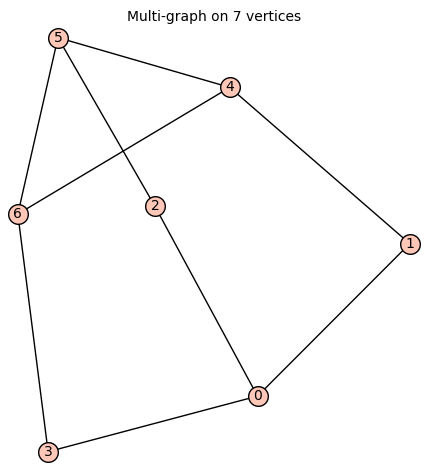

In [12]:
G1

In [13]:
G1.is_eulerian()

False

***
- #### Calling to `eulerian_count` shows that `G1` has no Eulerian cycle as expected.
- #### Choosing a spanning tree with edges $\{0,1,2,3,4,5\}$ whose complementary edge set is $F=\{6,7,8\}$, the formula in Theorem 1.1 of the paper is still computable with result values for circuits and closed walks being 6 and 3282 respectively. But since `G1` is not Eulerian, these values are not equal to the number of Eulerian circuits. 
- #### On the other hand, using Theorem 3.3, choosing $F$ to be the full edge set $\{0,1,2,3,4,5,6,7,8\}$, the correct result $0$ can be derived. 

In [14]:
eulerian_count(G1,directed=False, baseorientation = None)

(0, [])

In [15]:
circuit_count(G1,[6,7,8], 2,9,[1,1,1,1,1,1,1,1,1]),circuit_count(G1,[0,1,2,3,4,5,6,7,8], 2,9,[1,1,1,1,1,1,1,1,1])

(6.00000000000000, 0.000000000000000)

In [16]:
closedwalk_count(G1,[6,7,8], 2,9,[1,1,1,1,1,1,1,1,1]),closedwalk_count(G1,[0,1,2,3,4,5,6,7,8], 2,9,[1,1,1,1,1,1,1,1,1])

(3282.00000000000, 0.000000000000000)

***
#### `G2` corresponds to the graph $G_2$ in Figure 1b of the paper which is Eulerian.

In [17]:
G2 = Graph({0:[1,2,2,3],1:[2,3,3],2:[3]});G1.allow_multiple_edges(True)

In [18]:
G2.vertices()

[0, 1, 2, 3]

In [19]:
G2.edges()

[(0, 1, None), (0, 2, None), (0, 2, None), (0, 3, None), (1, 2, None), (1, 3, None), (1, 3, None), (2, 3, None)]

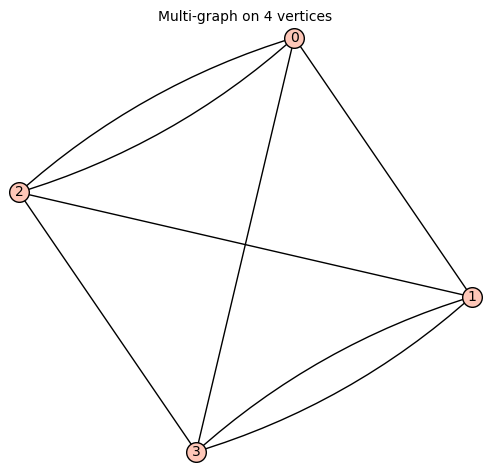

In [20]:
G2

In [21]:
G2.is_eulerian()

True

***
- #### Calling to `eulerian_count` shows that `G2` has $6$ Eulerian cycles as a directed graph. The orientation defined by `baseorientation = [1,1,0,0,0,1,1,0]` is consistent with Figure 1b. 
- #### Choosing a spanning tree with edges $\{0,1,3\}$ whose complementary edge set is $F=\{2,4,5,6,7\}$, calling to `circuit_count` and `closedwalk_count` based on the formula in Theorem 4.4 with $t=3$ or $4$, the same result $6$ can be derived. 

In [22]:
eulerian_count(G2,directed=True, baseorientation = [1,1,0,0,0,1,1,0])

6

In [23]:
circuit_count(G2,[2,4,5,6,7], 3,8,[-1,-1,1,1,1,-1,-1,1])/8, circuit_count(G2,[2,4,5,6,7], 4,8,[-1,-1,1,1,1,-1,-1,1])/8

(6.00000000000000 - 6.39634664393094e-16*I, 6.00000000000000)

In [24]:
closedwalk_count(G2,[2,4,5,6,7], 3,8,[-1,-1,1,1,1,-1,-1,1])/8, closedwalk_count(G2,[2,4,5,6,7], 4,8,[-1,-1,1,1,1,-1,-1,1])/8

(6.00000000000001 + 4.67847068813235e-15*I, 6.00000000000000)

***
- #### Calling to `eulerian_count` shows that `G2` has $88$ Eulerian cycles as a directed graph. The $16$ Eulerian orientations are also displayed with respect to `baseorientation = [1,1,0,0,0,1,1,0]`. 
- #### Also choosing a spanning tree with edges $\{0,1,3\}$ whose complementary edge set is $F=\{2,4,5,6,7\}$, calling to `circuit_count` and `closedwalk_count` based on the formula in Theorem 1.1 with $t=2$, the same result $88$ can be derived. 

In [25]:
eulerian_count(G2,directed=False, baseorientation = [1,1,0,0,0,1,1,0])

(88,
 [([0, 0, 0, 0, 0, 0, 0, 0], 6, 1),
  ([0, 0, 0, 0, 1, 0, 1, 1], 5, 1),
  ([0, 0, 0, 0, 1, 1, 0, 1], 5, 1),
  ([0, 1, 0, 1, 1, 0, 1, 0], 6, 1),
  ([0, 1, 0, 1, 1, 1, 0, 0], 6, 1),
  ([0, 1, 1, 0, 0, 0, 0, 0], 6, 1),
  ([0, 1, 1, 0, 1, 0, 1, 1], 5, 1),
  ([0, 1, 1, 0, 1, 1, 0, 1], 5, 1),
  ([1, 0, 0, 1, 0, 0, 1, 0], 5, 1),
  ([1, 0, 0, 1, 0, 1, 0, 0], 5, 1),
  ([1, 0, 0, 1, 1, 1, 1, 1], 6, 1),
  ([1, 0, 1, 0, 0, 0, 1, 1], 6, 1),
  ([1, 0, 1, 0, 0, 1, 0, 1], 6, 1),
  ([1, 1, 1, 1, 0, 0, 1, 0], 5, 1),
  ([1, 1, 1, 1, 0, 1, 0, 0], 5, 1),
  ([1, 1, 1, 1, 1, 1, 1, 1], 6, 1)])

In [26]:
circuit_count(G2,[2,4,5,6,7], 2,8,[1,1,1,1,1,1,1,1])/8, closedwalk_count(G2,[2,4,5,6,7], 2,8,[1,1,1,1,1,1,1,1])/8

(88.0000000000000, 88.0000000000000)